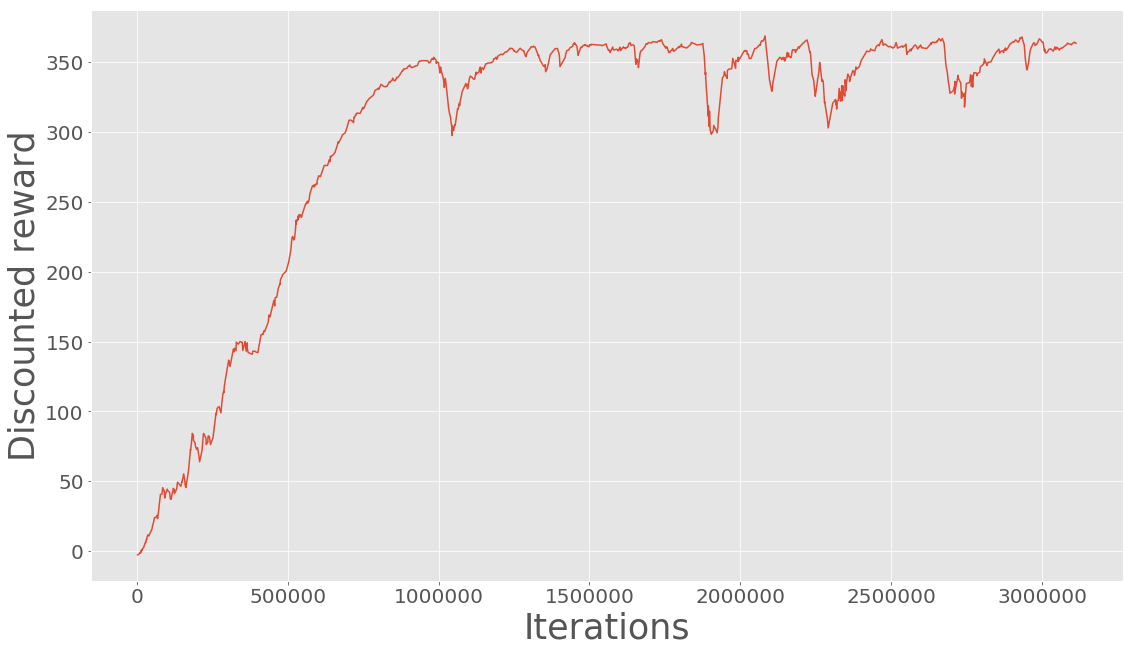

In [25]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')

filename_log5 = './run-log_10-tag-input_info_discounted_rewards.csv'
filename_log6 = './run-log_6-tag-input_info_discounted_rewards.csv'
# iter_log6 = iteration
# r_log6 = r

import csv

with open(filename_log5) as f:
    reader = csv.reader(f)
    next(reader)
    
    data5 = [r for r in reader]

with open(filename_log6) as f:
    reader = csv.reader(f)
    next(reader)
    
    data6 = [r for r in reader]
    
# a = np.zeros(np.size(data))
iter_log5 = np.zeros(np.size(data5))
r_log5 = np.zeros(np.size(data5))

iter_log6 = np.zeros(np.size(data6))
r_log6 = np.zeros(np.size(data6))

i=0
for _ in data5:
    a = data5[i]
    iter_log5[i] = np.array(a[1])
    r_log5[i] = np.array(a[2])
    i+=1
i=0
for _ in data6:
    a = data6[i]
    iter_log6[i] = np.array(a[1])
    r_log6[i] = np.array(a[2])
    i+=1

# np.size(r_log6)
# np.size(iteration)

mpl.rc('font',family='Times New Roman')
mpl.rc('xtick', labelsize=20) 
mpl.rc('ytick', labelsize=20) 

end = 960
# plt.plot(iteration[0:end],r[0:end])
# plt.plot(iter_log5[0:700],r_log5[0:700],iter_log6[0:end-1],r_log6[0:end-1])
plt.plot(iter_log5[0:end],r_log5[0:end])
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xlabel('Iterations',fontsize=35, fontname='Times New Roman')
plt.ylabel('Discounted reward',fontsize=35)
# plt.xlabel('$\mathrm{Iterations}$',fontsize=40,usetex=True)
# plt.ylabel('$\mathrm{Discounted}$ $\mathrm{reward}$',fontsize=40,usetex=True)
# plt.text(0.5, 0.5, 'Discounted reward', horizontalalignment='center',verticalalignment='center', fontsize=16, fontname='Times New Roman')


plt.savefig('reward.pdf', format='pdf', dpi=200, bbox_inches='tight') 
plt.show()



In [38]:

## Pickle
import pickle

action = pickle.load(open('action.p', "rb"))
print(action)


## the following commands are used for saving and cropping of images
# convert thumb0105.jpg -crop 300x300+1150+650 t105.jpg

# convert frames/exp0219.jpg -crop 380x380+420+180 frames/e219.jpg

[ 0.6557408   0.3266071   1.          1.         -0.24104956 -0.17707255
 -1.         -0.16387495 -1.         -0.09723692]


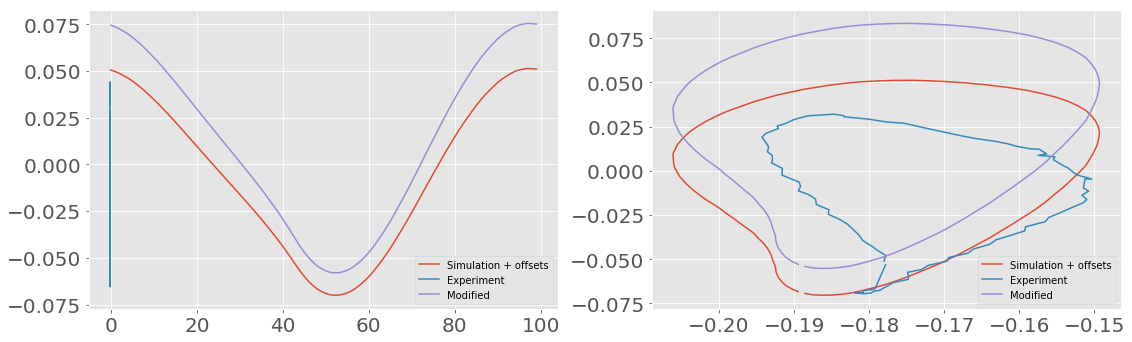

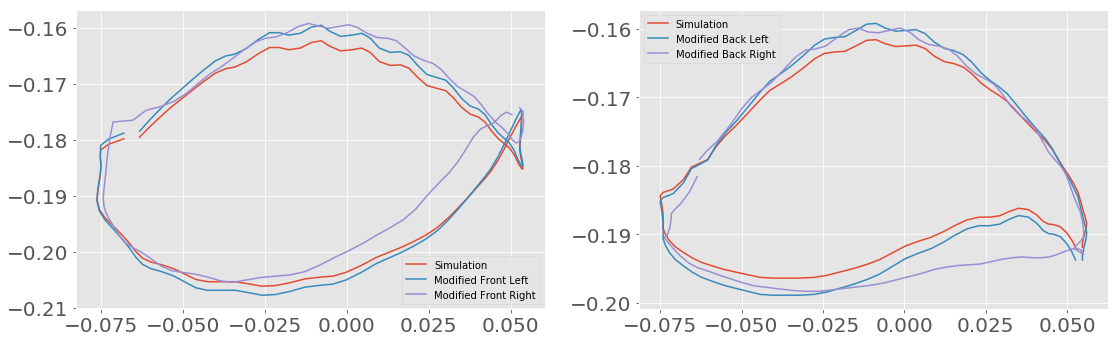

In [86]:
## here we provide the constants

yscaleF = 1.1
yoffsetF = 0.019

yscaleB = 1.14
yoffsetB = 0.025


# here we plot the end effector trajectories
# xydata_simulation = np.loadtxt('save.txt', delimiter=' ')
############ gather experimental data
xydata_experiment = np.loadtxt('roman.txt', delimiter=' ')

xy_s = xydata_experiment[:,[0,1,2,3]]
xy_r = xydata_experiment[:,[4,5,6,7]]

x_m_fl = xy_s[0:100,0]
y_m_fl = yscaleF * (xy_s[0:100,1]) + yoffsetF

#################### Plotting front leg xy trajectory
plt.subplot(1,2,1)
plt.plot(xy_s[0:100,0], xy_s[0:100,1],
         xy_r[0:100,0], xy_r[0:100,1],
         x_m_fl, y_m_fl);

plt.legend(('Simulation + offsets','Experiment','Modified'));


x_m_bl = xy_s[0:100,2]
y_m_bl = yscaleB * (xy_s[0:100,3]) + yoffsetB

#################### Plotting back leg xy trajectory
plt.subplot(1,2,2)
plt.plot(xy_s[0:100,2], xy_s[0:100,3],
         xy_r[0:100,2], xy_r[0:100,3],
         x_m_bl, y_m_bl);

plt.legend(('Simulation + offsets','Experiment','Modified'));

fig = plt.gcf()
fig.set_size_inches(18.5, 5.5) # if using only two subplots then fig.set_size_inches(18.5, 5.5)
plt.savefig('Comparison1', format='png', dpi=100, bbox_inches='tight') 

#################### Loading Gait from training
xydata_mjc_simulator = np.loadtxt('save_sim.txt', delimiter=' ')
# offsets = 0,-0.005,0,-0.005,0.01,-0.01,0.01,-0.01
offsets = 0,-0.0,0,-0.0,0.0,-0.0,0.0,-0.0

x_m_fl = xydata_mjc_simulator[:,0] + offsets[0]
x_m_bl = xydata_mjc_simulator[:,1] + offsets[1]

x_m_fr = xydata_mjc_simulator[:,2] + offsets[2]
x_m_br = xydata_mjc_simulator[:,3] + offsets[3]

y_m_fl = yscaleF * (xydata_mjc_simulator[:,4] + offsets[4]) + yoffsetF
y_m_bl = yscaleB * (xydata_mjc_simulator[:,5] + offsets[5]) + yoffsetB

y_m_fr = yscaleF * (xydata_mjc_simulator[:,6] + offsets[6]) + yoffsetF
y_m_br = yscaleB * (xydata_mjc_simulator[:,7] + offsets[7]) + yoffsetB



plt.figure()

#################### Plotting front leg xy trajectory
plt.subplot(1,2,1)
plt.plot(xydata_mjc_simulator[:,0], xydata_mjc_simulator[:,4], x_m_fl, y_m_fl, x_m_fr, y_m_fr);
plt.legend(('Simulation','Modified Front Left','Modified Front Right'));

#################### Plotting back leg xy trajectory
plt.subplot(1,2,2)
plt.plot(xydata_mjc_simulator[:,1], xydata_mjc_simulator[:,5], x_m_bl, y_m_bl, x_m_br, y_m_br);
plt.legend(('Simulation','Modified Back Left','Modified Back Right'));

fig = plt.gcf()
fig.set_size_inches(18.5, 5.5) # if using only two subplots then fig.set_size_inches(18.5, 5.5)
plt.savefig('Comparison2', format='png', dpi=100, bbox_inches='tight') 


In [329]:

# Data ordering is changed here for implementing the gait in hardware
# FLX, BLX ,FRX, BRX ,FLY, BLY ,FRY ,BRY ,SPINE1 ,SPIN2
final_data = np.array([x_m_fl, x_m_bl, x_m_fr, x_m_br, y_m_fl, y_m_bl, y_m_fr, y_m_br, np.zeros(100), np.zeros(100)]).T

output_file = 'save.txt'

# Append the data
ans = input("Save xy data to file? (y/n):")

if ans=='y':
    # Clear out the file
    txt_file = open(output_file, 'w')
    txt_file.close()
    
    # Append the data
    txt_file = open(output_file, 'a')
    
    for i in range(len(final_data)):
        print_data = final_data[i]
        txt_file.write(' '.join(str(format(j, '.4f')) for j in print_data)+"\n")
        
    txt_file.close()
    print("Saved to",output_file)
else:
    print("Not saved")

Save xy data to file? (y/n):y
Saved to save_manually_modified.txt


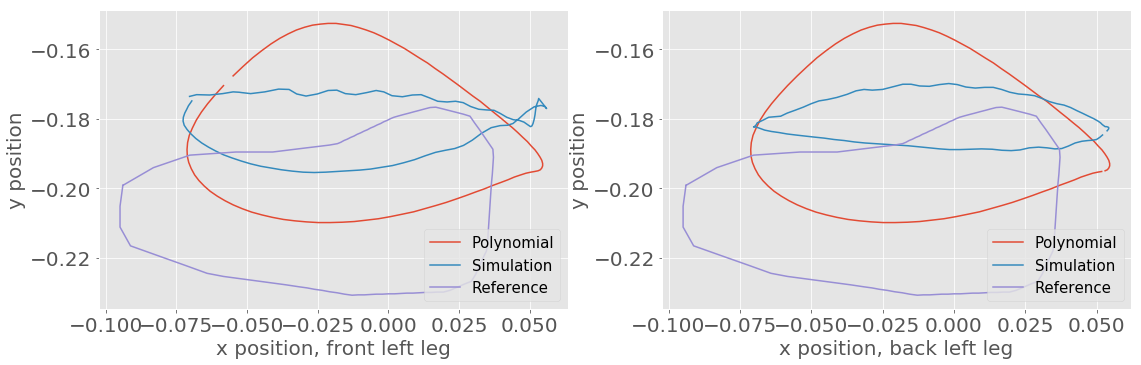

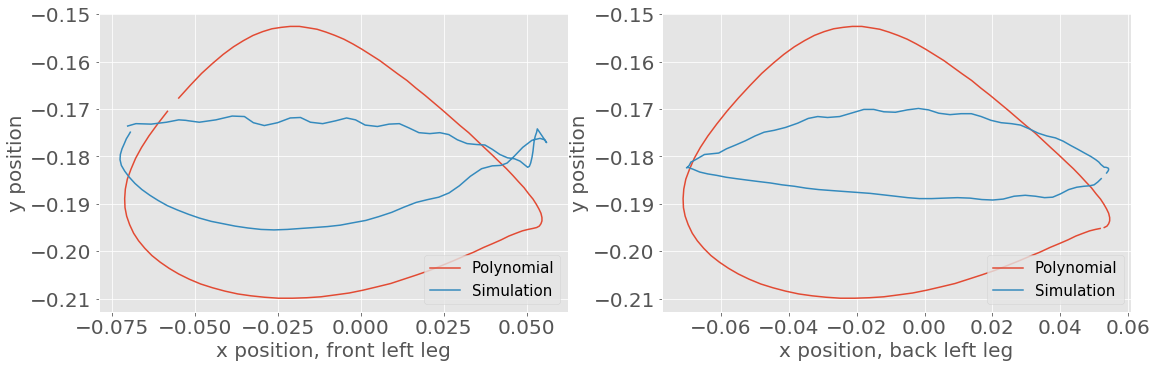

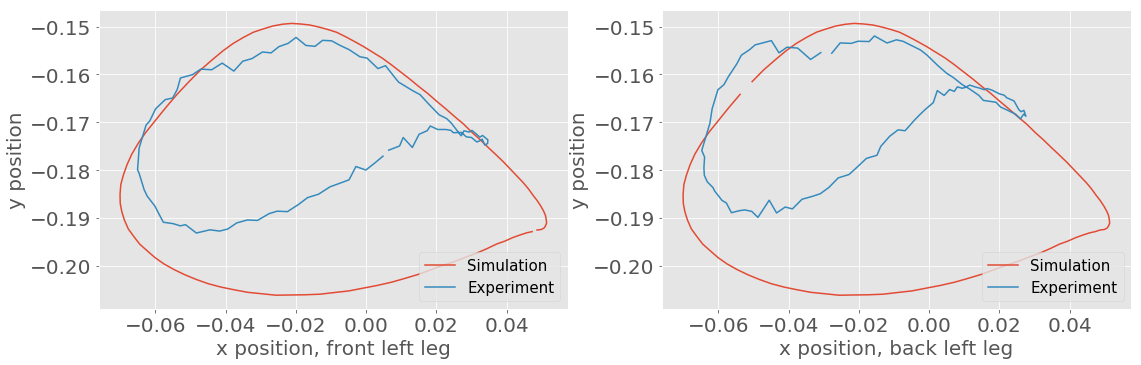

In [36]:
import matplotlib
import matplotlib.pyplot as plt


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

xy_sim = np.loadtxt('save_sim.txt', delimiter=' ')
xy_poly = np.loadtxt('save_poly.txt', delimiter=' ')

ref_FLx=np.array([-0.0939,-0.0831,-0.0702,-0.0539,-0.0409,-0.0369,-0.0329,-0.0289,-0.0248,-0.0208,
                     -0.0180,-0.0168,-0.0157,-0.0145,-0.0133,-0.0121,-0.0110,-0.0098,-0.0086,-0.0074,
                     -0.0063,-0.0051,-0.0039,-0.0027,-0.0016,-0.0004,0.0008,0.0020,0.0037,0.0055,
                     0.0074,0.0092,0.0111,0.0129,0.0148,0.0168,0.0193,0.0217,0.0241,0.0265,
                     0.0289,0.0305,0.0322,0.0338,0.0354,0.0370,0.0372,0.0370,0.0368,0.0365,
                     0.0363,0.0361,0.0359,0.0357,0.0355,0.0353,0.0352,0.0347,0.0334,0.0321,
                     0.0309,0.0294,0.0269,0.0244,0.0218,0.0195,0.0173,0.0152,0.0130,0.0109,
                     0.0087,0.0066,0.0044,0.0022,0.0001,-0.0021,-0.0042,-0.0064,-0.0085,-0.0107,
                     -0.0128,-0.0155,-0.0181,-0.0208,-0.0234,-0.0261,-0.0287,-0.0314,-0.0363,-0.0418,
                     -0.0473,-0.0528,-0.0583,-0.0641,-0.0719,-0.0802,-0.0912,-0.0949,-0.0949,-0.0939])

ref_FRx=np.array([0.0368,0.0365,0.0363,0.0361,0.0359,0.0357,0.0355,0.0353,0.0352,0.0347,
                      0.0334,0.0321,0.0309,0.0294,0.0269,0.0244,0.0218,0.0195,0.0173,0.0152,
                      0.0130,0.0109,0.0087,0.0066,0.0044,0.0022,0.0001,-0.0021,-0.0042,-0.0064,
                      -0.0085,-0.0107,-0.0128,-0.0155,-0.0181,-0.0208,-0.0234,-0.0261,-0.0287,-0.0314,
                      -0.0363,-0.0418,-0.0473,-0.0528,-0.0583,-0.0641,-0.0719,-0.0802,-0.0912,-0.0949,
                      -0.0949,-0.0939,-0.0939,-0.0831,-0.0702,-0.0539,-0.0409,-0.0369,-0.0329,-0.0289,
                      -0.0248,-0.0208,-0.0180,-0.0168,-0.0157,-0.0145,-0.0133,-0.0121,-0.0110,-0.0098,
                      -0.0086,-0.0074,-0.0063,-0.0051,-0.0039,-0.0027,-0.0016,-0.0004,0.0008,0.0020,
                      0.0037,0.0055,0.0074,0.0092,0.0111,0.0129,0.0148,0.0168,0.0193,0.0217,
                      0.0241,0.0265,0.0289,0.0305,0.0322,0.0338,0.0354,0.0370,0.0372,0.0370])

ref_FLy=np.array([-0.1992,-0.1941,-0.1905,-0.1896,-0.1896,-0.1892,-0.1888,-0.1884,-0.1880,-0.1876,
                      -0.1872,-0.1868,-0.1863,-0.1859,-0.1854,-0.1850,-0.1845,-0.1841,-0.1836,-0.1832,
                      -0.1827,-0.1823,-0.1818,-0.1814,-0.1809,-0.1805,-0.1800,-0.1796,-0.1792,-0.1788,
                      -0.1784,-0.1780,-0.1776,-0.1772,-0.1768,-0.1767,-0.1772,-0.1777,-0.1782,-0.1787,
                      -0.1793,-0.1812,-0.1831,-0.1850,-0.1869,-0.1888,-0.1911,-0.1936,-0.1960,-0.1985,
                      -0.2009,-0.2033,-0.2058,-0.2083,-0.2108,-0.2132,-0.2157,-0.2181,-0.2203,-0.2226,
                      -0.2248,-0.2268,-0.2276,-0.2285,-0.2294,-0.2299,-0.2299,-0.2300,-0.2300,-0.2301,
                      -0.2302,-0.2302,-0.2303,-0.2304,-0.2304,-0.2305,-0.2305,-0.2306,-0.2307,-0.2307,
                      -0.2308,-0.2305,-0.2301,-0.2298,-0.2294,-0.2291,-0.2287,-0.2284,-0.2278,-0.2272,
                      -0.2266,-0.2260,-0.2254,-0.2245,-0.2222,-0.2198,-0.2166,-0.2112,-0.2052,-0.1992])

ref_FRy=np.array([-0.1960,-0.1985,-0.2009,-0.2033,-0.2058,-0.2083,-0.2108,-0.2132,-0.2157,-0.2181,
                      -0.2203,-0.2226,-0.2248,-0.2268,-0.2276,-0.2285,-0.2294,-0.2299,-0.2299,-0.2300,
                      -0.2300,-0.2301,-0.2302,-0.2302,-0.2303,-0.2304,-0.2304,-0.2305,-0.2305,-0.2306,
                      -0.2307,-0.2307,-0.2308,-0.2305,-0.2301,-0.2298,-0.2294,-0.2291,-0.2287,-0.2284,
                      -0.2278,-0.2272,-0.2266,-0.2260,-0.2254,-0.2245,-0.2222,-0.2198,-0.2166,-0.2112,
                      -0.2052,-0.1992,-0.1992,-0.1941,-0.1905,-0.1896,-0.1896,-0.1892,-0.1888,-0.1884,
                      -0.1880,-0.1876,-0.1872,-0.1868,-0.1863,-0.1859,-0.1854,-0.1850,-0.1845,-0.1841,
                      -0.1836,-0.1832,-0.1827,-0.1823,-0.1818,-0.1814,-0.1809,-0.1805,-0.1800,-0.1796,
                      -0.1792,-0.1788,-0.1784,-0.1780,-0.1776,-0.1772,-0.1768,-0.1767,-0.1772,-0.1777,
                      -0.1782,-0.1787,-0.1793,-0.1812,-0.1831,-0.1850,-0.1869,-0.1888,-0.1911,-0.1936])
        

plt.subplot(1,2,1)
plt.plot(xy_poly[:,0], xy_poly[:,4], xy_sim[:,0], xy_sim[:,4], ref_FLx[-100:], ref_FLy[-100:])
plt.xlabel('x position, front left leg',fontsize=20)
plt.ylabel('y position',fontsize=20)
plt.gca().legend(('Polynomial','Simulation','Reference'),fontsize=15,loc=4)

plt.subplot(1,2,2)
plt.plot(xy_poly[:,1], xy_poly[:,5], xy_sim[:,1], xy_sim[:,5], ref_FLx[-100:], ref_FLy[-100:])
plt.xlabel('x position, back left leg',fontsize=20)
plt.ylabel('y position',fontsize=20)
plt.gca().legend(('Polynomial','Simulation','Reference'),fontsize=15,loc=4)

fig = plt.gcf()
fig.set_size_inches(18.5, 5.5) # if using only two subplots then fig.set_size_inches(18.5, 5.5)
plt.savefig('GaitSimulation.pdf', format='pdf', dpi=200, bbox_inches='tight') 

plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.plot(xy_poly[:,0], xy_poly[:,4], xy_sim[:,0], xy_sim[:,4])
plt.xlabel('x position, front left leg',fontsize=20)
plt.ylabel('y position',fontsize=20)
plt.gca().legend(('Polynomial','Simulation'),fontsize=15,loc=4)

plt.subplot(1,2,2)
plt.plot(xy_poly[:,1], xy_poly[:,5], xy_sim[:,1], xy_sim[:,5])
plt.xlabel('x position, back left leg',fontsize=20)
plt.ylabel('y position',fontsize=20)
plt.gca().legend(('Polynomial','Simulation'),fontsize=15,loc=4)

fig = plt.gcf()
fig.set_size_inches(18.5, 5.5) # if using only two subplots then fig.set_size_inches(18.5, 5.5)
plt.savefig('sim.png', format='png', dpi=200, bbox_inches='tight') 

plt.show()

###############################################
xydata_experiment = np.loadtxt('roman.txt', delimiter=' ')
xy_s = xydata_experiment[:,[0+1,1+1,2+1,3+1]]
xy_r = xydata_experiment[:,[4+1,5+1,6+1,7+1]]


#################### Plotting front leg xy trajectory
plt.figure()
plt.subplot(1,2,1)
plt.plot(xy_s[100:200,0], xy_s[100:200,1], xy_r[100:200,0], xy_r[100:200,1]);
plt.xlabel('x position, front left leg',fontsize=20)
plt.ylabel('y position',fontsize=20)
plt.gca().legend(('Simulation','Experiment'),fontsize=15,loc=4)

#################### Plotting back leg xy trajectory
plt.subplot(1,2,2)
plt.plot(xy_s[100:200,2], xy_s[100:200,3], xy_r[100:200,2], xy_r[100:200,3]);
plt.legend(('Simulation','Experiment'));
plt.xlabel('x position, back left leg',fontsize=20)
plt.ylabel('y position',fontsize=20)
plt.gca().legend(('Simulation','Experiment'),fontsize=15,loc=4)

fig = plt.gcf()
fig.set_size_inches(18.5, 5.5) # if using only two subplots then fig.set_size_inches(18.5, 5.5)
plt.savefig('sim_v_exp.pdf', format='pdf', dpi=200, bbox_inches='tight') 
